In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/sample_data/netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Fill missing values all at once
df = df.fillna({
    'director': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown',
    'date_added': df['date_added'].mode()[0],
    'rating': df['rating'].mode()[0],
    'duration': 'Unknown'
})

In [ ]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

In [ ]:
# Extract year and month once
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['month_name'] = df['date_added'].dt.month_name()

/tmp/ipython-input-1577925338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


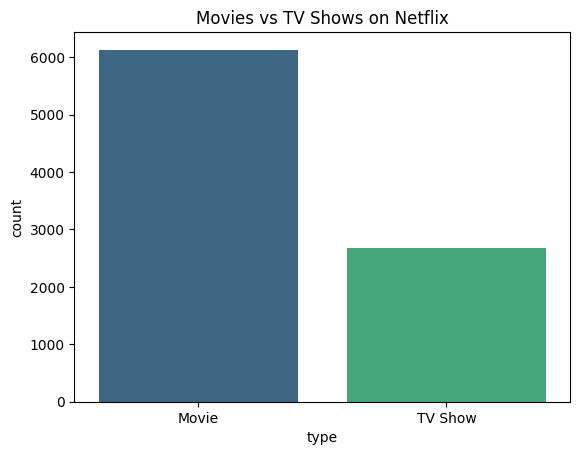

In [ ]:
#Movies vs TV Shows
sns.countplot(data=df, x='type', palette='viridis')
plt.title("Movies vs TV Shows on Netflix")
plt.show()

/tmp/ipython-input-106803344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')


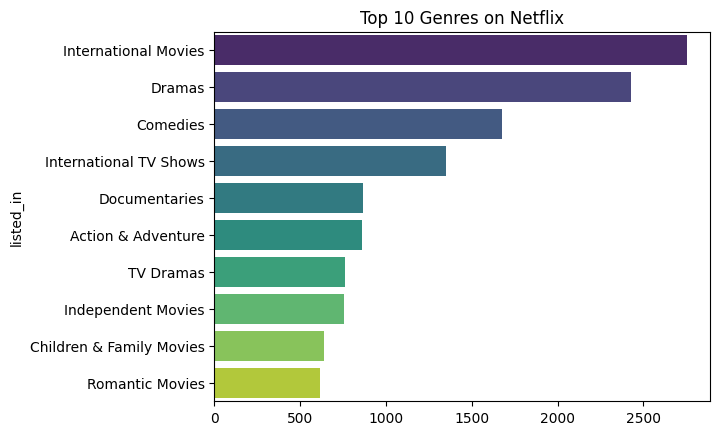

In [ ]:
#Top 10 Genres
top_genres = (
    df['listed_in'].str.split(',').explode().str.strip().value_counts().head(10)
)
sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.show()

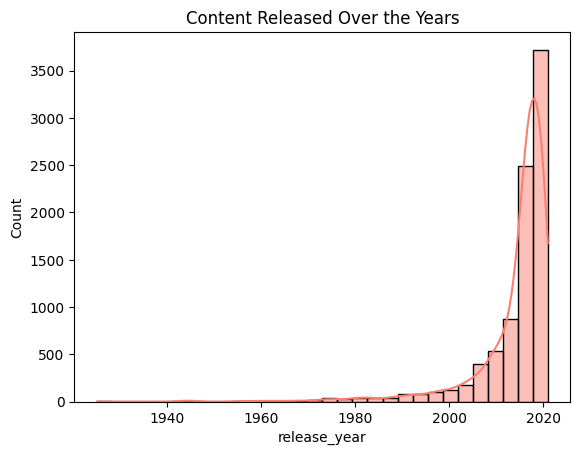

In [ ]:
#Netflix content growth over year
sns.histplot(data=df, x='release_year', bins=30, kde=True, color='salmon')
plt.title("Content Released Over the Years")
plt.show()

/tmp/ipython-input-2595081722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


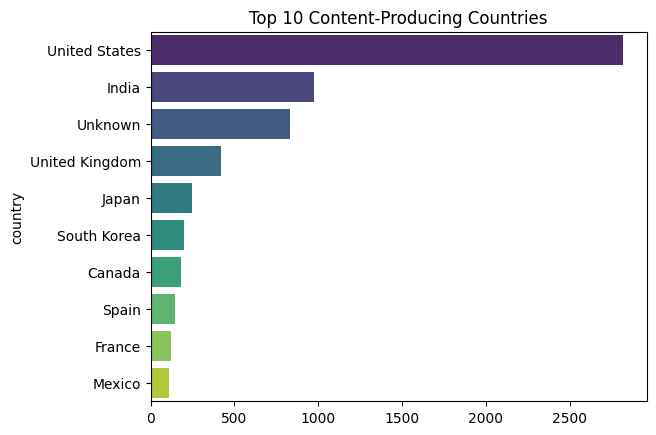

In [ ]:
#Top 10 Countries
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Content-Producing Countries")
plt.show()

/tmp/ipython-input-3623321865.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette='viridis')


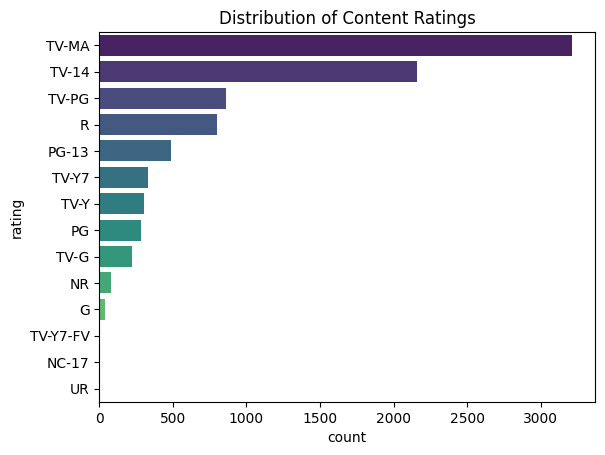

In [ ]:
#Ratings Distribution
df = df[~df['rating'].str.contains('min', na=False)] # Removing rows where rating column accidentally contains duration values

sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette='viridis')
plt.title("Distribution of Content Ratings")
plt.show()

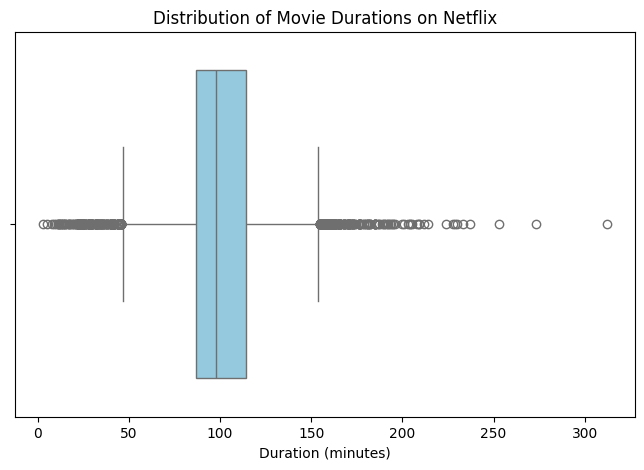

In [ ]:
#Box Plot --> Distribution for movie duration
# Create a copy to avoid modifying the main column
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)

# Create a new column to separate type
df['duration_type'] = df['duration'].apply(lambda x: 'Season' if 'Season' in x else 'Minute')

#Movies and TV shows duration
plt.figure(figsize=(8,5))
sns.boxplot(data=df[df['duration_type'] == 'Minute'], x='duration_num', color='skyblue')
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.show()

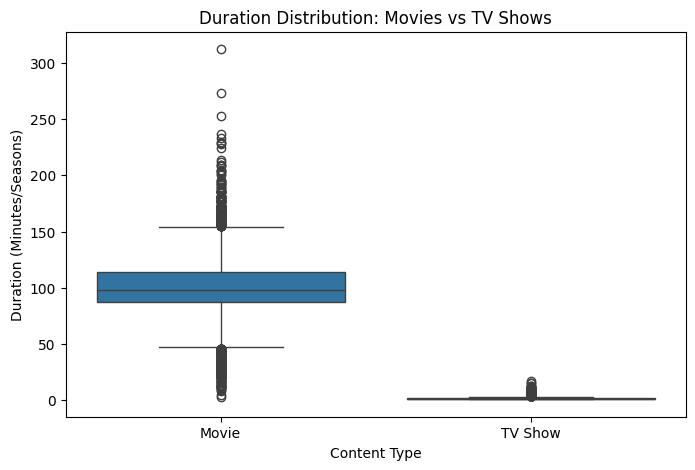

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='type', y='duration_num', hue=None)
plt.title("Duration Distribution: Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Duration (Minutes/Seasons)")
plt.show()

In [ ]:
#Keyword Frequency
popular_keywords = ["love", "crime", "family", "war", "school", "friend", "thriller", "life"]
for word in popular_keywords:
    print(word, df['description'].str.contains(word, case=False, na=False).sum())

love 703
crime 222
family 630
war 505
school 393
friend 916
thriller 37
life 917


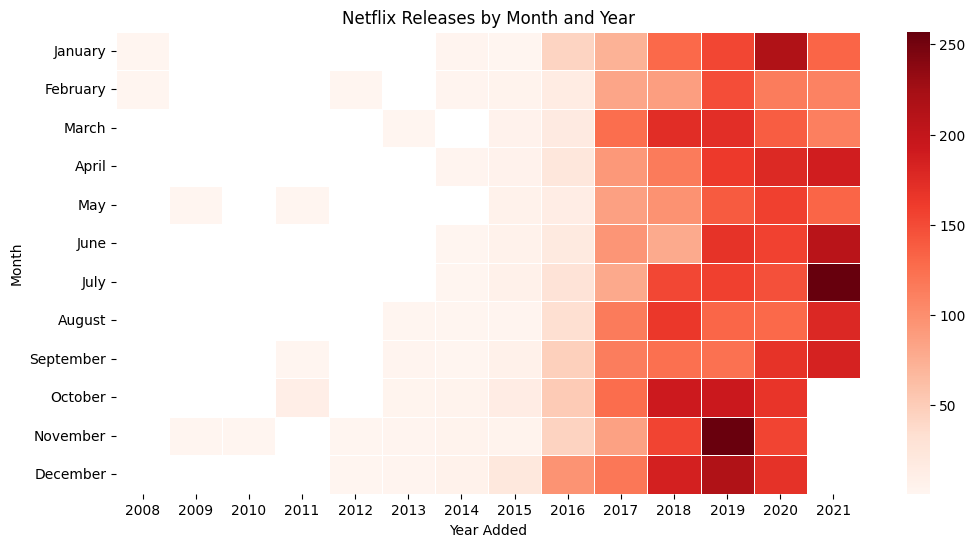

In [ ]:
#A. Releases by Month and Year
heatmap_data = df.pivot_table(
    index='month_name', columns='year_added', values='show_id', aggfunc='count'
)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
heatmap_data = heatmap_data.reindex(months)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='Reds', linewidths=.5)
plt.title('Netflix Releases by Month and Year')
plt.xlabel('Year Added')
plt.ylabel('Month')
plt.show()

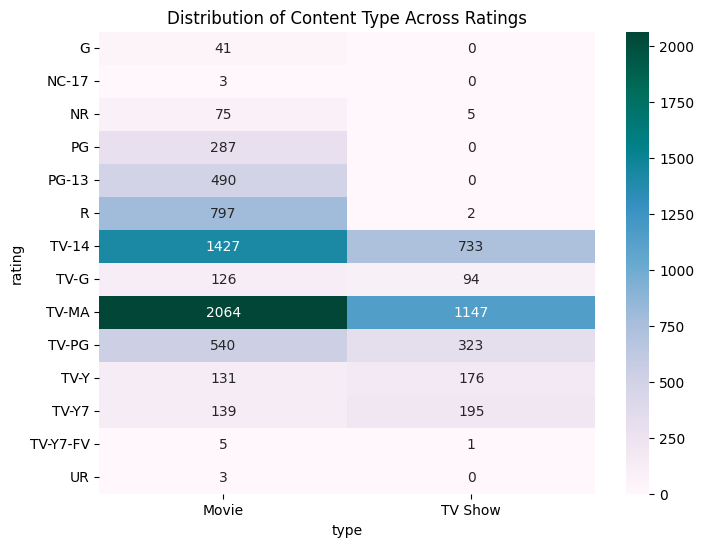

In [ ]:
#B. Ratings vs Content Type
df = df[~df['rating'].str.contains('min', na=False)] # Removing rows where rating column accidentally contains duration values

rating_type = pd.crosstab(df['rating'], df['type'])
plt.figure(figsize=(8,6))
sns.heatmap(rating_type, annot=True, fmt='d', cmap='PuBuGn')
plt.title('Distribution of Content Type Across Ratings')
plt.show()

### Recommendation Insight
Based on the keyword analysis, the most common themes are **life**, **friendship**, **love**, and **family**,
showing audiences connect most with emotional and relationship-based stories.
Thriller themes like **crime** and **murder** are also significant, suggesting suspenseful storytelling remains popular.  
Netflix could focus on producing more **drama-based series** and **romantic thrillers** that blend emotion with tension
to maintain strong global engagement.


## Summary & Key Insights

-  Movies slightly outnumber TV Shows on Netflix.
-  USA and India dominate content production.
-  Drama and Comedy are the most common genres.
-  TV-MA and TV-14 ratings dominate, showing Netflix’s mature audience focus.
-  Themes like **love**, **life**, and **friendship** appear most frequently.
-  Content growth peaked between **2018–2020**, marking Netflix’s expansion phase.
-  Recommendation: Netflix should continue investing in **drama and romantic thrillers** to align with audience demand.
